In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data//customers.csv")

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
print(X.head())


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Ashutosh Upadhyay\AppData\Local\Temp\ipykernel_14452\3380160216.py:4: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Downloads\Mall_Customers.csv")


   Annual Income (k$)  Spending Score (1-100)
0                  53                      47
1                 144                      94
2                 145                      62
3                 127                      69
4                 115                      76


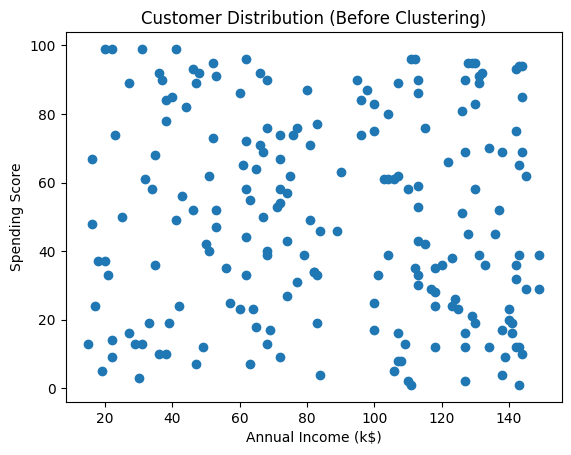

In [2]:
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Distribution (Before Clustering)")
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


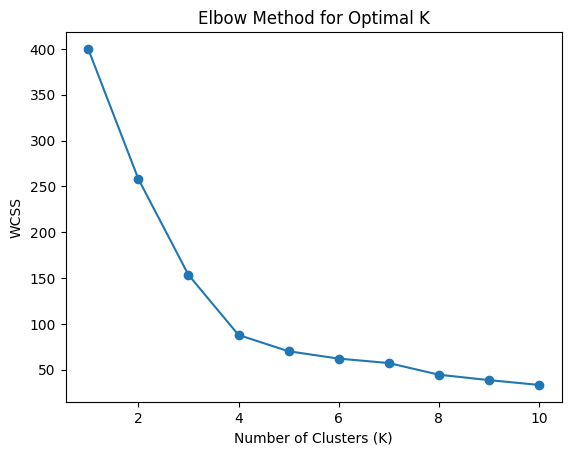

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df["Cluster"] = clusters


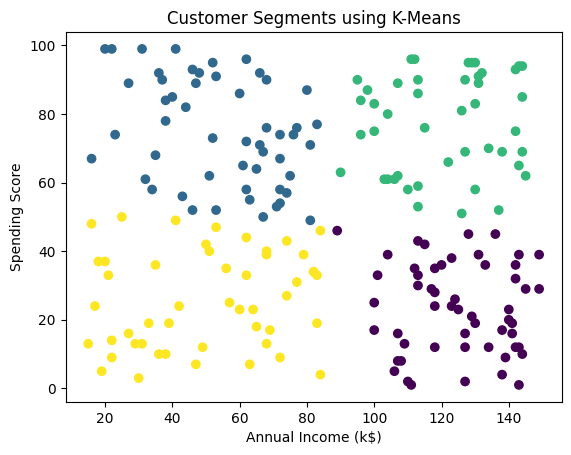

In [7]:
plt.scatter(
    X["Annual Income (k$)"],
    X["Spending Score (1-100)"],
    c=clusters
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segments using K-Means")
plt.show()
